In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mesostat.metric.dim3d.partialcorr import partial_corr

In [2]:
rezLst = []

# Noise
src = np.random.normal(0, 1, 100)
trg = np.random.normal(0, 1, 100)
conf = np.random.normal(0, 1, 100)
corr = np.corrcoef(src, trg)[0, 1]
pcorr = partial_corr(src, trg, np.array([conf]))
rezLst += [['Noise', corr, pcorr]]

# Fork
conf = np.random.normal(0, 1, 100)
src = conf
trg = conf
corr = np.corrcoef(src, trg)[0, 1]
pcorr = partial_corr(src, trg, np.array([conf]))
rezLst += [['Fork', corr, pcorr]]

# Pipe
src = np.random.normal(0, 1, 100)
conf = src
trg = conf
corr = np.corrcoef(src, trg)[0, 1]
pcorr = partial_corr(src, trg, np.array([conf]))
rezLst += [['Pipe', corr, pcorr]]

# Collider
src = np.random.normal(0, 1, 100)
trg = np.random.normal(0, 1, 100)
conf = src + trg
corr = np.corrcoef(src, trg)[0, 1]
pcorr = partial_corr(src, trg, np.array([conf]))
rezLst += [['Collider', corr, pcorr]]

In [3]:
rezArr = np.array(rezLst)
df = pd.DataFrame(index = rezArr[:, 0])
df['Corr'] = np.array(rezArr[:, 1]).astype(float)
df['PCorr'] = np.array(rezArr[:, 2]).astype(float)
df

,Corr,PCorr
Noise,-0.056053,-0.078791
Fork,1.000000,0.060021
Pipe,1.000000,0.054527
Collider,-0.017406,-1.000000


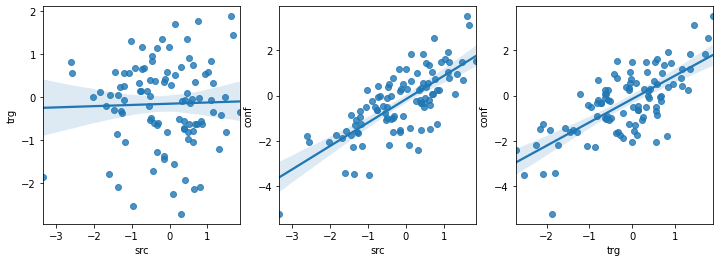

In [39]:
dfData = pd.DataFrame({'src': src, 'trg': trg, 'conf': conf})

fig, ax = plt.subplots(ncols=3, figsize=(12,4))
sns.regplot(ax=ax[0], data=dfData, x='src', y='trg')
sns.regplot(ax=ax[1], data=dfData, x='src', y='conf')
sns.regplot(ax=ax[2], data=dfData, x='trg', y='conf')
plt.show()